# Explore with Pandas

In [1]:
import pandas as pd
import os
import pandera as pa
import glob
import matplotlib.pyplot as plt

display(pd.__version__)

import ipython_memory_usage as imu
%ipython_memory_usage_start

'2.0.1'

'memory profile enabled'

In [1] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 203.15 MiB


In [2]:
DATA_FOLDER = '/home/ian/workspace/data/anonymised_mot_tests'
DATA_FOLDER = os.path.join(DATA_FOLDER, 'test_result_2021')
#DATA_FOLDER

files = glob.glob(DATA_FOLDER+"/test_result_*.csv")
DATA_FOLDER, files

('/home/ian/workspace/data/anonymised_mot_tests/test_result_2021',
 ['/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32355.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32361.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32372.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32367.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32365.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32386.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32357.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32378.csv',
  '/home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_

In [2] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 203.15 MiB


In [3]:
#filename = 'test_result_2021/test_result_20220531131730_32355.csv'
dfs = []
for filename in files:
    #filename = files[0]
    print(f"Loading {filename}")
    df = pd.read_csv(filename)
    dfs.append(df)

Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32355.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32361.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32372.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32367.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32365.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32386.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32357.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32378.csv
Loading /home/ian/workspace/data/anonymised_mot_tests/test_result_2021/test_result_20220531131730_32370.csv
Loading /home/ian/workspace/

In [4]:
df = pd.concat(dfs)

In [4] used 4899.5156 MiB RAM in 5.53s, peaked 0.00 MiB above current, total RAM usage 9808.60 MiB


In [5]:
# seem to need to run this after concat, as before columns get de-categorised
cat_cols = ['test_class_id', 'test_type', 'test_result', 'postcode_area', 'make', 'model', 'colour', 'fuel_type']
for cat_col in cat_cols:
    df[cat_col] = df[cat_col].astype('category')

In [5] used -1969.1562 MiB RAM in 14.79s, peaked 2327.05 MiB above current, total RAM usage 7839.44 MiB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40380646 entries, 0 to 3363312
Data columns (total 14 columns):
 #   Column             Dtype   
---  ------             -----   
 0   test_id            int64   
 1   vehicle_id         int64   
 2   test_date          object  
 3   test_class_id      category
 4   test_type          category
 5   test_result        category
 6   test_mileage       float64 
 7   postcode_area      category
 8   make               category
 9   model              category
 10  colour             category
 11  fuel_type          category
 12  cylinder_capacity  float64 
 13  first_use_date     object  
dtypes: category(8), float64(2), int64(2), object(2)
memory usage: 2.6+ GB
In [6] used 2.2930 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 7841.73 MiB


In [7]:
df['first_use_date_raw'] = df['first_use_date']
df['first_use_date'] = pd.to_datetime(df['first_use_date_raw'], errors='coerce')
#OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 4-02-20 00:00:00, at position 904021. You might want to try:
#    - passing `format` if your strings have a consistent format;
#    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
#    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7] used 309.2969 MiB RAM in 6.50s, peaked 616.08 MiB above current, total RAM usage 8151.03 MiB


In [8]:
df['test_date_raw'] = df['test_date']
df['test_date'] = pd.to_datetime(df['test_date_raw'], errors='coerce')

In [8] used 308.2188 MiB RAM in 3.67s, peaked 528.42 MiB above current, total RAM usage 8459.25 MiB


In [9]:
from pandera import DataFrameSchema, Column, Check, Index, MultiIndex
from pandera.errors import SchemaErrors

VALID_TEST_RESULT = set(['P', 'F', 'PRS', 'ABR', 'ABA', 'ABRVE'])
VALID_TEST_TYPE = set(['NT', 'RT', 'ES'])
VALID_COLOUR = set(['BLACK', 'WHITE', 'SILVER', 'BLUE', 'GREY', 'RED', 'GREEN', 'ORANGE', 'YELLOW', 'BEIGE', \
                   'BROWN', 'PURPLE', 'GOLD', 'BRONZE', 'MAROON','TURQUOISE', 'CREAM', 'PINK', 'MULTI-COLOUR', 'NOT STATED'])
VALID_FUEL_TYPE = set(['PE', 'DI', 'HY', 'EL', 'OT', 'LP', 'ED', 'GB', 'FC', 'CN', 'GA', 'GD','ST', 'LN'])

# by default Column has nullable, coerce, unique, refex == False
# title is not needed nor description

# other checks?
# test_mileage 5th percentile > xxx as most should be "sensible"
# postcode_area xx very rare
# cylinder_capacity typically more than ...
# first_use_date > ... something reasonable


schema = DataFrameSchema(
    columns={
        "test_id": Column(
            dtype="int64",
            checks=[
                #Check.greater_than_or_equal_to(min_value=31563.0),
                #Check.less_than_or_equal_to(max_value=1999897323.0),
            ],
        ),
        "vehicle_id": Column(
            dtype="int64",
            checks=[
                #Check.greater_than_or_equal_to(min_value=108275.0),
                #Check.less_than_or_equal_to(max_value=1499704119.0),
            ],
        ),
        "test_date": Column(
            dtype="datetime",
            coerce=False
        ),
        "test_class_id": Column(
            dtype="category",
            checks=[
                # WHAT'S A GOOD RANGE?
                #Check.greater_than_or_equal_to(min_value=1.0),
                #Check.less_than_or_equal_to(max_value=7.0),
            ],
        ),
        "test_type": Column(
            dtype="category",
            checks=[pa.Check(lambda s: s.isin(VALID_TEST_TYPE))],
        ),
        "test_result": Column(
            dtype="category",
            checks=[Check(lambda s: s.isin(VALID_TEST_RESULT)),
                    # we normally see 75% pass rate, so test >60%
                    Check(lambda ser: ((ser == 'P').sum() / ser.size) > 0.6)],
        ),
        "test_mileage": Column(
            dtype="float64",
            checks=[
                # we do get 1-10 miles on the clock!
                Check.greater_than_or_equal_to(min_value=1.0),
                Check.less_than_or_equal_to(max_value=999999.0),
            ],
            nullable=True,
        ),
        "postcode_area": Column(
            dtype="category",
            checks=None,
        ),
        "make": Column(
            dtype="category",
            nullable=True,
            checks=[pa.Check(lambda ser: ser.isnull().sum() <= 5)]
        ),
        "model": Column(
            dtype="category",
            nullable=True
        ),
        "colour": Column(
            dtype="category",
            checks=[pa.Check(lambda s: s.isin(VALID_COLOUR))],
        ),
        "fuel_type": Column(
            dtype="category",
            checks=[Check(lambda s: s.isin(VALID_FUEL_TYPE))],
        ),
        "cylinder_capacity": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=0.0),
                Check.less_than_or_equal_to(max_value=99999.0),
                # TODO added percentile check
            ],
            nullable=True,
        ),
        "first_use_date": Column(
            dtype="datetime",
            nullable=True
        ),
    },
    checks=None,
    index=Index(
        dtype="int64",
        checks=[
            #Check.greater_than_or_equal_to(min_value=1030.0),
            #Check.less_than_or_equal_to(max_value=3362152.0),
        ],
    ),
    dtype=None,
    coerce=False,
    strict=False,
    name=None,
    ordered=False,
    unique=None,
    report_duplicates="all",
    unique_column_names=False,
    title=None,
    description=None,
)

try:
    schema.validate(df, lazy=True) # RESTRICTED
except SchemaErrors as err:
    print(err.failure_cases)  # dataframe of schema errors
    print(err.data)  # invalid dataframe


In [9] used 2927.0664 MiB RAM in 5.22s, peaked 1757.45 MiB above current, total RAM usage 11386.32 MiB


# Plot first use year vs mileage

In [13]:
df_sample = df.sample(1_000)
dfx = df_sample[['test_mileage', 'first_use_date']].copy()
dfx = dfx.dropna()
dfx

,test_mileage,first_use_date
2882486,129372.0,2008-12-01
1192348,21707.0,2016-11-24
2431636,156192.0,2007-12-17
644337,12680.0,2017-03-15
3336766,65167.0,2008-03-13
...,...,...
407545,66372.0,2013-03-20
1292476,65947.0,2013-05-31
333066,57046.0,2016-03-18
2832372,28331.0,2018-10-13


In [13] used 0.3242 MiB RAM in 1.56s, peaked 2.19 MiB above current, total RAM usage 8466.76 MiB


In [14]:
# https://github.com/ianozsvald/notes_to_self/blob/master/simpler_mpl.py

def set_common_mpl_styles(
    ax,
    legend=True,
    grid_axis="y",
    ylabel=None,
    xlabel=None,
    title=None,
    ymin=None,
    xmin=None,
):
    """Nice common plot configuration
    We might use it via `fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 6))`
    """
    if grid_axis is not None:
        # depending on major/minor grid frequency we might
        # need the simpler form
        # ax.grid(axis=grid_axis)
        ax.grid(visible=True, which="both", axis=grid_axis)
    #if legend is False: # CHANGED
    #    ax.legend_.remove()
    #else:
    #    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if title is not None:
        ax.set_title(title)
    if ymin is not None:
        ax.set_ylim(ymin=ymin)
    if xmin is not None:
        ax.set_xlim(xmin=xmin)


def rotate_labels(x_axis=False, y_axis=False, rotation=-90):
    if x_axis:
        plt.xticks(rotation=rotation)
    if y_axis:
        plt.yticks(rotation=rotation)


def set_commas(ax, x_axis=False, y_axis=False):
    # NOTE this may not work well e.g. on bar plots
    # in which case make a df_to_plot where index has been
    # reset, turned with string formatting into good result,
    # then index has been set again
    texts = []
    if x_axis:
        ticks = ax.get_xticks()
        tick_labels = ax.get_xticklabels()
        for label in tick_labels:
            text = label.get_text()
            texts.append(f"{int(text):,}")
        plt.xticks(ticks=ticks, labels=texts)
    if y_axis:
        ticks = ax.get_yticks()
        tick_labels = ax.get_yticklabels()
        for label in tick_labels:
            text = label.get_text()
            text = text.replace('−', '-') # CHANGED
            texts.append(f"{int(text):,}")
        plt.yticks(ticks=ticks, labels=texts)

In [14] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 8466.76 MiB


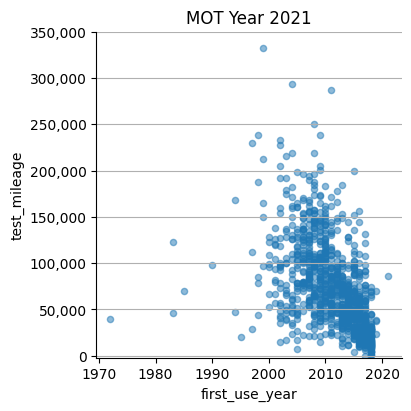

In [15] used 0.2539 MiB RAM in 0.28s, peaked 0.00 MiB above current, total RAM usage 8467.02 MiB


In [15]:
dfx['first_use_year'] = dfx['first_use_date'].dt.year
#dfx = dfx.set_index('first_use_year')

fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
dfx.plot(kind='scatter', x='first_use_year', y='test_mileage', alpha=0.5, ax=ax)
set_commas(ax, y_axis=True)
set_common_mpl_styles(ax, ymin=-2000, title="MOT Year 2021")

(-2000.0, 400000.0)

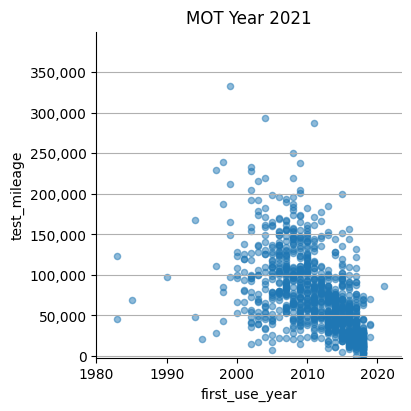

In [16] used 0.5156 MiB RAM in 0.28s, peaked 0.00 MiB above current, total RAM usage 8467.53 MiB


In [16]:
dfx['first_use_year'] = dfx['first_use_date'].dt.year
#dfx = dfx.set_index('first_use_year')

fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
dfx.plot(kind='scatter', x='first_use_year', y='test_mileage', alpha=0.5, ax=ax)
set_commas(ax, y_axis=True)
set_common_mpl_styles(ax, ymin=-2000, title="MOT Year 2021")
ax.set_xlim(xmin=1980)
ax.set_ylim(ymax=400000)

# quick hack to look in to the volvo and passat

In [17]:
df['first_use_year'] = df['first_use_date'].dt.year


In [17] used 308.1328 MiB RAM in 1.88s, peaked 2.25 MiB above current, total RAM usage 8775.66 MiB


In [18]:
# https://www.ebay.co.uk/itm/166050536198
df.query('make=="VOLVO" and model=="V50" and fuel_type=="DI" \
and test_result=="P" and first_use_year==2005')['test_mileage'].describe()

count      1893.000000
mean     147694.984680
std       38235.841446
min       11697.000000
25%      123573.000000
50%      147722.000000
75%      172023.000000
max      339348.000000
Name: test_mileage, dtype: float64

In [18] used -0.6484 MiB RAM in 0.42s, peaked 759.89 MiB above current, total RAM usage 8775.02 MiB


In [19]:
# https://www.facebook.com/marketplace/item/956054899045224/

df.query('make=="VOLKSWAGEN" and model=="PASSAT" and fuel_type=="PE" \
and test_result=="P" and first_use_year==1999')['test_mileage'].describe()

count       330.000000
mean     128494.012121
std       48560.709765
min       21820.000000
25%       95334.500000
50%      125398.500000
75%      157700.750000
max      380196.000000
Name: test_mileage, dtype: float64

In [19] used -0.3125 MiB RAM in 0.41s, peaked 808.04 MiB above current, total RAM usage 8774.70 MiB
